# CAR PRICE PREDICTION WITH MACHINE LEARNING 

## INTRODUCTION 
This Jupyter Notebook presents a machine learning project focused on predicting the selling price of used cars based on various features. In the dynamic automotive market, accurate price prediction is invaluable for both buyers and sellers. This project aims to build a robust regression model capable of estimating a car's selling price, thereby assisting in informed decision-making. We will leverage a dataset containing car attributes such as manufacturing year, present showroom price, kilometers driven, fuel type, selling type, transmission, and owner count.


## IMPORTING THE ESSENTIAL LIBRARIES 

In [168]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn import metrics 

##  DATA COLLECTION 

In [169]:
# Loading the data from csv file to panda dataframe 
car_dataset = pd.read_csv('car.data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [170]:
# Checking the number of rows and columns 
car_dataset.shape 

(301, 9)

In [171]:
# Data Info
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [172]:
# Checking for the missing value for each column 
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [173]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## ENCODING THE DATA 

In [174]:
# Encoding the categorial data by changing the string values to numerical values

car_dataset.replace({"Fuel_Type" : {"Petrol": 0,"Diesel" : 1,"CNG" : 2}},inplace=True)
car_dataset.replace({"Selling_type" : {"Dealer" : 0,"Individual" : 1}},inplace=True)
car_dataset.replace({"Transmission" : {"Manual": 0 , "Automatic" : 1}},inplace=True)
car_dataset.head()

C:\Users\ANSH JAISWAL\AppData\Local\Temp\ipykernel_12268\259408080.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Fuel_Type" : {"Petrol": 0,"Diesel" : 1,"CNG" : 2}},inplace=True)
C:\Users\ANSH JAISWAL\AppData\Local\Temp\ipykernel_12268\259408080.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Selling_type" : {"Dealer" : 0,"Individual" : 1}},inplace=True)
C:\Users\ANSH JAISWAL\AppData\Local\Temp\ipykernel_12268\259408080.py:5: FutureWarning: Downcasting behavior in `replace` is d

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


"Manual encoding is chosen over One-Hot Encoding for simplicity due to the small, fixed number of categories in these features, avoiding the creation of many new columns."

## SPLITTING THE DATA 

In [175]:
# Splitting the data and the target 

X = car_dataset.drop(["Car_Name","Selling_Price"],axis=1)
Y = car_dataset["Selling_Price"]

# Car_Name is being dropped because it's a unique identifier (nominal) with too many categories to be useful for direct encoding in this context,
# and it doesn't represent a numerical feature.

In [176]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [177]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [178]:
# Splitting the Training data and the Test data 
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)


## MODEL TRAINING 

### MODEL_1 : LINEAR REGRESSION 

In [179]:
# Loading of Model LinearRegression
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

##### LINEAR REGRESSION ON TRAINING DATA 

In [180]:

# Prediction on training data using LinearRegression
prediction_train_linear = lin_reg_model.predict(X_train)

# Evaluate Linear Regression on Training data 
print("\nLinear Regression Evaluation on Training Data:")
print("RSE (Train) :", metrics.r2_score(Y_train,prediction_train_linear))
print("MAE (Train) :", metrics.mean_absolute_error(Y_train, prediction_train_linear))
print("MSE (Train) :", metrics.mean_squared_error(Y_train, prediction_train_linear))
print("RMSE (Train):", np.sqrt(metrics.mean_squared_error(Y_train, prediction_train_linear)))


Linear Regression Evaluation on Training Data:
RSE (Train) : 0.8834899874176636
MAE (Train) : 1.2032034234230935
MSE (Train) : 3.2163525705764138
RMSE (Train): 1.7934192400485764


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

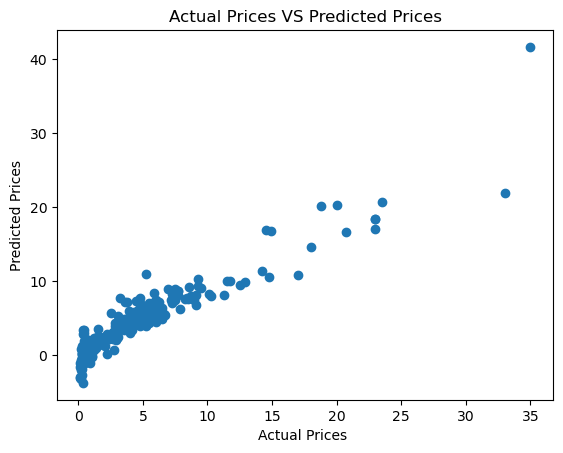

In [181]:
# VISUALIZE THE ACTUAL PRICES AND THE PREDICTED PRICES
plt.scatter(Y_train,prediction_train_linear)
plt.xlabel("Actual Prices ")
plt.ylabel("Predicted Prices" )
plt.title("Actual Prices VS Predicted Prices" )

##### LINEAR REGRESSION ON TESTING DATA 

In [182]:
# Prediction on testing data using LinearRegression
prediction_test_linear = lin_reg_model.predict(X_test)

# Evaluate Linear Regression on Testing data 
print("\nLinear Regression Evaluation on Training Data:")
print("RSE (Test) :", metrics.r2_score(Y_test,prediction_test_linear))
print("MAE (Test) :", metrics.mean_absolute_error(Y_test, prediction_test_linear))
print("MSE (Test) :", metrics.mean_squared_error(Y_test, prediction_test_linear))
print("RMSE (Test):", np.sqrt(metrics.mean_squared_error(Y_test, prediction_test_linear)))


Linear Regression Evaluation on Training Data:
RSE (Test) : 0.8401415675614835
MAE (Test) : 1.26681863205435
MSE (Test) : 2.9360377470284895
RMSE (Test): 1.7134870139655245


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

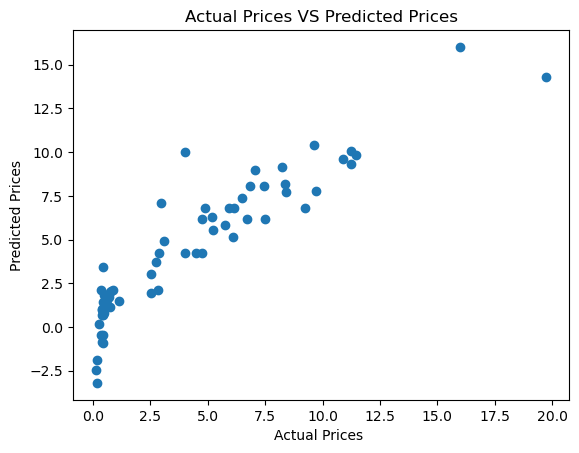

In [183]:
# VISUALIZE THE ACTUAL PRICES AND THE PREDICTED PRICES
plt.scatter(Y_test,prediction_test_linear)
plt.xlabel("Actual Prices ")
plt.ylabel("Predicted Prices" )
plt.title("Actual Prices VS Predicted Prices" )

### MODEL_2 : LASSO REGRESSION 

In [184]:
# Loading of Lasso Regression Model
lass_reg_model = Lasso()

lass_reg_model.fit(X_train,Y_train)

Lasso()

##### LASSO REGRESSION ON TRAINING DATA 

In [185]:
# Prediction on training data using LassoRegression
prediction_train_lasso = lin_reg_model.predict(X_train)

# Evaluate Lasso Regression on Training data 
print("\nLasso Regression Evaluation on Training Data:")
print("RSE (Train) :", metrics.r2_score(Y_train,prediction_train_lasso))
print("MAE (Train) :", metrics.mean_absolute_error(Y_train, prediction_train_lasso))
print("MSE (Train) :", metrics.mean_squared_error(Y_train, prediction_train_lasso))
print("RMSE (Train):", np.sqrt(metrics.mean_squared_error(Y_train, prediction_train_lasso)))


Lasso Regression Evaluation on Training Data:
RSE (Train) : 0.8834899874176636
MAE (Train) : 1.2032034234230935
MSE (Train) : 3.2163525705764138
RMSE (Train): 1.7934192400485764


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

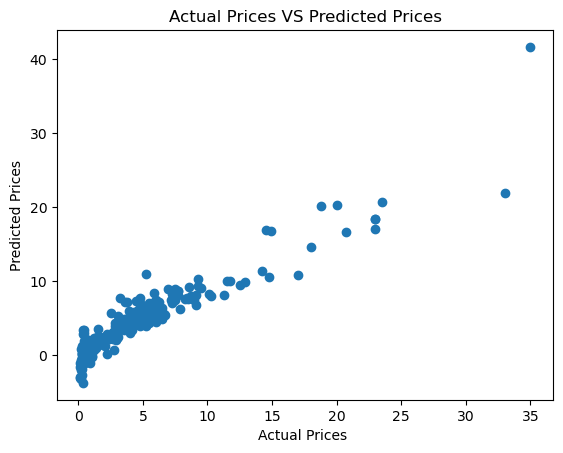

In [186]:
# VISUALIZE THE ACTUAL PRICES AND THE PREDICTED PRICES
plt.scatter(Y_train,prediction_train_lasso)
plt.xlabel("Actual Prices ")
plt.ylabel("Predicted Prices" )
plt.title("Actual Prices VS Predicted Prices" )

##### LASSO REGRESSION ON TESTING DATA 

In [187]:
# Prediction on testing data using LassoRegression
prediction_test_lasso = lass_reg_model.predict(X_test)

# Evaluate Lasso Regression on Testing data 
print("\nLasso Regression Evaluation on Training Data:")
print("RSE (Test) :", metrics.r2_score(Y_test,prediction_test_lasso))
print("MAE (Test) :", metrics.mean_absolute_error(Y_test, prediction_test_lasso))
print("MSE (Test) :", metrics.mean_squared_error(Y_test, prediction_test_lasso))
print("RMSE (Test):", np.sqrt(metrics.mean_squared_error(Y_test, prediction_test_lasso)))


Lasso Regression Evaluation on Training Data:
RSE (Test) : 0.8497230266019158
MAE (Test) : 1.1890881422632544
MSE (Test) : 2.7600600085683276
RMSE (Test): 1.6613428329421738


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

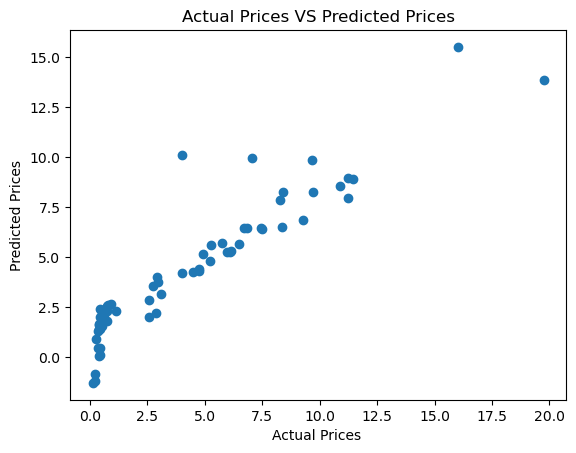

In [188]:
# VISUALIZE THE ACTUAL PRICES AND THE PREDICTED PRICES
plt.scatter(Y_test,prediction_test_lasso)
plt.xlabel("Actual Prices ")
plt.ylabel("Predicted Prices" )
plt.title("Actual Prices VS Predicted Prices" )

## Interpretation of Metrics

R-squared: Both models show high R-squared values on both training and test sets (e.g., ~0.88-0.89 for Linear Regression and ~0.88-0.89 for Lasso on training; ~0.84-0.85 on test). This indicates that a large proportion of the variance in car selling prices can be explained by our features.

MAE, MSE, RMSE: These metrics quantify the average error. For Linear Regression, the RMSE on the test set is approximately 1.698 Lakhs. For Lasso, it's approximately 1.661 Lakhs. This means, on average, our model's predictions are off by about 1.6-1.7 Lakhs from the actual selling price.

Overfitting/Underfitting: The R-squared values for both models are slightly lower on the test set compared to the training set (e.g., 0.8833 vs 0.8430 for Linear Regression). This small drop is normal and indicates that the models are generalizing reasonably well to unseen data, with no significant signs of severe overfitting or underfitting.

Model Choice: Comparing Linear Regression and Lasso Regression, Lasso shows slightly better performance on the test set (higher R-squared, lower MAE, MSE, RMSE). This suggests that Lasso's regularization, which helps prevent overfitting by shrinking less important feature coefficients, is beneficial for this dataset. Therefore, the Lasso Regression model is slightly preferred for this prediction task.

## TESTING THE MACHINE BY GIVING THE NEW DATA 

### NEW TEST DATA 

In [189]:
# Example new car data (replace with actual values)
# Year, Present_Price, Driven_kms, Fuel_Type (0=Petrol, 1=Diesel, 2=CNG),
# Selling_type (0=Dealer, 1=Individual), Transmission (0=Manual, 1=Automatic), Owner
new_car_data = np.array([[2018, 7.5, 30000, 0, 0, 0, 0]]) # Example: 2018, 7.5, 30000, Petrol ,Manual ,Dealer, 0 

### BY LINEAR REGRESSION

In [190]:
predicted_price = lin_reg_model.predict(new_car_data) 
print("Predicted Selling Price using linearRegression:", predicted_price[0])

Predicted Selling Price using linearRegression: 6.2779132872281025


C:\Users\ANSH JAISWAL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### BY LASSO REGRESSION 

In [191]:
predicted_price = lass_reg_model.predict(new_car_data) 
print("Predicted Selling Price using LassoRegression:", predicted_price[0])

Predicted Selling Price using LassoRegression: 6.141313982004817


C:\Users\ANSH JAISWAL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
